In [1]:
import matplotlib.pyplot as plt #Visulization
from matplotlib import rc # 한글 깨져서
import seaborn as sns #Visulization
import pandas as pd
import numpy as np

import scipy as sp
import scipy.stats

import datetime
from dateutil.relativedelta import relativedelta

import tensorflow as tf

import random
rc('font', family="Malgun Gothic")

#경고 끄기
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
random_seed = random.randrange(1,10000)
tf.set_random_seed(random_seed)

In [3]:
# Standardization
def data_standardization(x):
    x_np = np.asarray(x)
    return (x_np - x_np.mean()) / x_np.std()

In [4]:
# 너무 작거나 너무 큰 값이 학습을 방해하는 것을 방지하고자 정규화한다
# x가 양수라는 가정하에 최소값과 최대값을 이용하여 0~1사이의 값으로 변환
# Min-Max scaling
def min_max_scaling(x):
    x_np = np.asarray(x)
    # 1e-7은 0으로 나누는 오류 예방차원
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7) 

In [5]:
# 정규화된 값을 원래의 값으로 되돌린다
# 정규화하기 이전의 org_x값과 되돌리고 싶은 x를 입력하면 역정규화된 값을 리턴한다
def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

In [6]:
df = pd.read_csv(r'C:\농수산가격데이터\cabbage_data.csv')

In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df.head()

,년월,도,평균기온(-5미만),평균기온(-5~5미만),평균기온(5~15미만),평균기온(15~25미만),평균기온(25~35미만),일조시간(3미만),일조시간(3~6미만),일조시간(6~9미만),...,일강수량(0),일강수량(1~40미만),일강수량(40~80미만),일강수량(80~110미만),일강수량(110이상),최대풍속(0~4미만),최대풍속(4~10미만),최대풍속(10~14미만),최대풍속(14이상),kgPrice
0,2008-01,강원도,15.0,43.0,4.0,0.0,0.0,21.0,9.0,27.0,...,43.0,19.0,0.0,0.0,0.0,13.0,48.0,1.0,0.0,968.499267
1,2008-01,전라도,0.0,29.0,2.0,0.0,0.0,13.0,8.0,10.0,...,24.0,7.0,0.0,0.0,0.0,5.0,26.0,0.0,0.0,968.499267
2,2008-02,강원도,16.0,37.0,5.0,0.0,0.0,5.0,11.0,15.0,...,56.0,2.0,0.0,0.0,0.0,9.0,48.0,1.0,0.0,837.201915
3,2008-02,전라도,0.0,28.0,1.0,0.0,0.0,4.0,5.0,10.0,...,25.0,4.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,837.201915
4,2008-03,강원도,0.0,27.0,35.0,0.0,0.0,21.0,10.0,12.0,...,41.0,20.0,1.0,0.0,0.0,7.0,55.0,0.0,0.0,1011.106582


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 28 columns):
년월                  264 non-null object
도                   264 non-null object
평균기온(-5미만)          264 non-null float64
평균기온(-5~5미만)        264 non-null float64
평균기온(5~15미만)        264 non-null float64
평균기온(15~25미만)       264 non-null float64
평균기온(25~35미만)       264 non-null float64
일조시간(3미만)           264 non-null float64
일조시간(3~6미만)         264 non-null float64
일조시간(6~9미만)         264 non-null float64
일조시간(9~12미만)        264 non-null float64
일조시간(12~15미만)       264 non-null float64
최고기온일수              264 non-null float64
최저기온일수              264 non-null float64
1H최다강수량(10미만)       264 non-null float64
1H최다강수량(10~20미만)    264 non-null float64
1H최다강수량(20~40미만)    264 non-null float64
1H최다강수량(40이상)       264 non-null float64
일강수량(0)             264 non-null float64
일강수량(1~40미만)        264 non-null float64
일강수량(40~80미만)       264 non-null float64
일강수량(80~110미만)      264 non-null flo

In [10]:
df = df[df['도'] == '전라도']

In [11]:
volume = df.iloc[:,2:-1]

In [12]:
# 부동소수점화
norm_volume = min_max_scaling(volume)
print("volume.shape: ", volume.shape)
# print("volume[0]: ", volume.iloc[0])
# print("norm_volume[0]: ", norm_volume[0])
# print("="*100) # 화면상 구분용

volume.shape:  (132, 25)


In [13]:
price = df.iloc[:,-1]
price = price.values.reshape(-1,1)

In [14]:
# 부동소수점화
norm_price = min_max_scaling(price)
print("price.shape: ", price.shape)
# print("price[0]: ", price.iloc[0])
# print("norm_price[0]: ", norm_price[0])
# print("="*100) # 화면상 구분용

price.shape:  (132, 1)


In [15]:
x = norm_volume
y = norm_price

In [16]:
dataX = [] # 입력으로 사용될 Sequence Data
dataY = [] # 출력(타켓)으로 사용

seq_length = 50            # 1개 시퀀스의 길이(시계열데이터 입력 개수)
for i in range(0, len(y) - seq_length):
    _x = x[i : i+seq_length]
    _y = y[i + seq_length] # 다음달 가격
    if i is 0:
        print(_x, "->", _y) # 첫번째 행만 출력해 봄
    dataX.append(_x) # dataX 리스트에 추가
    dataY.append(_y) # dataY 리스트에 추가

[[0.         0.93548387 0.06451613 ... 0.83870967 0.         0.        ]
 [0.         0.9032258  0.03225806 ... 0.93548387 0.         0.        ]
 [0.         0.29032258 0.70967742 ... 1.         0.         0.        ]
 ...
 [0.         0.70967742 0.29032258 ... 0.61290322 0.         0.        ]
 [0.         0.93548387 0.06451613 ... 0.74193548 0.         0.        ]
 [0.03225806 0.80645161 0.09677419 ... 0.77419355 0.         0.        ]] -> [0.44179214]


In [17]:
# 학습용/테스트용 데이터 생성
# 전체 70%를 학습용 데이터로 사용
train_size = int(len(dataY) * 0.7)
# 나머지(30%)를 테스트용 데이터로 사용
test_size = len(dataY) - train_size
 
# 데이터를 잘라 학습용 데이터 생성
trainX = np.array(dataX[0:train_size])
trainY = np.array(dataY[0:train_size])
 
# 데이터를 잘라 테스트용 데이터 생성
testX = np.array(dataX[train_size:len(dataX)])
testY = np.array(dataY[train_size:len(dataY)])

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(57, 50, 25)
(57, 1)
(25, 50, 25)
(25, 1)


In [18]:
# 하이퍼파라미터
input_data_column_cnt = trainX.shape[2]  # 입력데이터의 컬럼 개수(Variable 개수)
output_data_column_cnt = trainY.shape[1] # 결과데이터의 컬럼 개수
 
rnn_cell_hidden_dim = 50   # 각 셀의 (hidden)출력 크기
forget_bias = 1.0          # 망각편향(기본값 1.0)
num_stacked_layers = 1     # stacked LSTM layers 개수
keep_prob = 1.0            # dropout할 때 keep할 비율
 
epoch_num = 10000           # 에폭 횟수(학습용전체데이터를 몇 회 반복해서 학습할 것인가 입력)
learning_rate = 0.005       # 학습률

In [19]:
# 텐서플로우 플레이스홀더 생성
# 입력 X, 출력 Y를 생성한다
X = tf.placeholder(tf.float32, [None, seq_length, input_data_column_cnt])
print("X: ", X)
Y = tf.placeholder(tf.float32, [None, 1])
print("Y: ", Y)

X:  Tensor("Placeholder:0", shape=(?, 50, 25), dtype=float32)
Y:  Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)


In [20]:
# 검증용 측정지표를 산출하기 위한 targets, predictions를 생성한다
targets = tf.placeholder(tf.float32, [None, 1])
print("targets: ", targets)
 
predictions = tf.placeholder(tf.float32, [None, 1])
print("predictions: ", predictions)

targets:  Tensor("Placeholder_2:0", shape=(?, 1), dtype=float32)
predictions:  Tensor("Placeholder_3:0", shape=(?, 1), dtype=float32)


In [21]:
# 모델(LSTM 네트워크) 생성
def lstm_cell():
    # LSTM셀을 생성
    # num_units: 각 Cell 출력 크기
    # forget_bias:  to the biases of the forget gate 
    #              (default: 1)  in order to reduce the scale of forgetting in the beginning of the training.
    # state_is_tuple: True ==> accepted and returned states are 2-tuples of the c_state and m_state.
    # state_is_tuple: False ==> they are concatenated along the column axis.
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=rnn_cell_hidden_dim, 
                                        forget_bias=forget_bias, state_is_tuple=True, activation=tf.nn.softsign)
    if keep_prob < 1.0:
        cell = tf.contrib.rnn.DropoutWrapper(cell, output_keep_prob=keep_prob)
    return cell

In [22]:
# num_stacked_layers개의 층으로 쌓인 Stacked RNNs 생성
stackedRNNs = [lstm_cell() for _ in range(num_stacked_layers)]
multi_cells = tf.contrib.rnn.MultiRNNCell(stackedRNNs, state_is_tuple=True) if num_stacked_layers > 1 else lstm_cell()

W0719 18:11:04.653031  6740 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0719 18:11:04.654029  6740 deprecation.py:323] From <ipython-input-21-7cad900779bf>:10: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


In [23]:
# RNN Cell(여기서는 LSTM셀임)들을 연결
hypothesis, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)
print("hypothesis: ", hypothesis)

W0719 18:11:04.661012  6740 deprecation.py:323] From <ipython-input-23-c25db3b61094>:2: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
W0719 18:11:04.712872  6740 deprecation.py:506] From c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0719 18:11:04.718830  6740 deprecation.py:506] From c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\rnn_cell_impl.py:738: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instru

hypothesis:  Tensor("rnn/transpose_1:0", shape=(?, 50, 50), dtype=float32)


In [24]:
# [:, -1]를 잘 살펴보자. LSTM RNN의 마지막 (hidden)출력만을 사용했다.
# 과거 여러 거래일의 주가를 이용해서 다음날의 주가 1개를 예측하기때문에 MANY-TO-ONE형태이다
hypothesis = tf.contrib.layers.fully_connected(hypothesis[:, -1], output_data_column_cnt, activation_fn=tf.identity)

In [25]:
# 손실함수로 평균제곱오차를 사용한다
loss = tf.reduce_sum(tf.square(hypothesis - Y))
# 최적화함수로 AdamOptimizer를 사용한다
optimizer = tf.train.AdamOptimizer(learning_rate)
# optimizer = tf.train.RMSPropOptimizer(learning_rate) # LSTM과 궁합 별로임
 
train = optimizer.minimize(loss)

In [26]:
# RMSE(Root Mean Square Error)
# 제곱오차의 평균을 구하고 다시 제곱근을 구하면 평균 오차가 나온다
# rmse = tf.sqrt(tf.reduce_mean(tf.square(targets-predictions))) # 아래 코드와 같다
rmse = tf.sqrt(tf.reduce_mean(tf.squared_difference(targets, predictions)))

In [27]:
train_error_summary = [] # 학습용 데이터의 오류를 중간 중간 기록한다
test_error_summary = []  # 테스트용 데이터의 오류를 중간 중간 기록한다
test_predict = ''        # 테스트용데이터로 예측한 결과

In [28]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [29]:
print(trainX.shape)
print(trainY.shape)

(57, 50, 25)
(57, 1)


In [30]:
# 학습한다
start_time = datetime.datetime.now() # 시작시간을 기록한다
print('학습을 시작합니다...')
for epoch in range(epoch_num):
    _, _loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
    if ((epoch+1) % 1000 == 0) or (epoch == epoch_num-1): # 1000번째마다 또는 마지막 epoch인 경우
        # 학습용데이터로 rmse오차를 구한다
        train_predict = sess.run(hypothesis, feed_dict={X: trainX})
        train_error = sess.run(rmse, feed_dict={targets: trainY, predictions: train_predict})
        train_error_summary.append(train_error)
 
        # 테스트용데이터로 rmse오차를 구한다
        test_predict = sess.run(hypothesis, feed_dict={X: testX})
        test_error = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
        test_error_summary.append(test_error)
        
        # 현재 오류를 출력한다
        print("epoch: {}, train_error(A): {}, test_error(B): {}, B-A: {}".format(epoch+1, train_error, test_error, test_error-train_error))

학습을 시작합니다...
epoch: 1000, train_error(A): 0.0012843436561524868, test_error(B): 0.1292058825492859, B-A: 0.12792153656482697
epoch: 2000, train_error(A): 2.375887197558768e-05, test_error(B): 0.130242720246315, B-A: 0.130218967795372
epoch: 3000, train_error(A): 0.006900637410581112, test_error(B): 0.1319626420736313, B-A: 0.1250620037317276
epoch: 4000, train_error(A): 5.612648601527326e-05, test_error(B): 0.12910358607769012, B-A: 0.1290474534034729
epoch: 5000, train_error(A): 0.00022795150289312005, test_error(B): 0.13256120681762695, B-A: 0.13233324885368347
epoch: 6000, train_error(A): 1.775911329104929e-07, test_error(B): 0.1332109421491623, B-A: 0.13321076333522797
epoch: 7000, train_error(A): 2.385992559084116e-07, test_error(B): 0.133604496717453, B-A: 0.1336042582988739
epoch: 8000, train_error(A): 0.003258266020566225, test_error(B): 0.12435559928417206, B-A: 0.12109733372926712
epoch: 9000, train_error(A): 5.0208445401267454e-08, test_error(B): 0.12472296506166458, B-A: 0.

In [31]:
end_time = datetime.datetime.now() # 종료시간을 기록한다
elapsed_time = end_time - start_time # 경과시간을 구한다
print('elapsed_time:',elapsed_time)
print('elapsed_time per epoch:',elapsed_time/epoch_num)

elapsed_time: 0:02:14.855730
elapsed_time per epoch: 0:00:00.013486


In [32]:
# 하이퍼파라미터 출력
print(random_seed)
print('input_data_column_cnt:', input_data_column_cnt, end='')
print(',output_data_column_cnt:', output_data_column_cnt, end='')
 
print(',seq_length:', seq_length, end='')
print(',rnn_cell_hidden_dim:', rnn_cell_hidden_dim, end='')
print(',forget_bias:', forget_bias, end='')
print(',num_stacked_layers:', num_stacked_layers, end='')
print(',keep_prob:', keep_prob, end='')
 
print(',epoch_num:', epoch_num, end='')
print(',learning_rate:', learning_rate, end='')
 
print(',train_error:', train_error_summary[-1], end='')
print(',test_error:', test_error_summary[-1], end='')
print(',min_test_error:', np.min(test_error_summary))

486
input_data_column_cnt: 25,output_data_column_cnt: 1,seq_length: 50,rnn_cell_hidden_dim: 50,forget_bias: 1.0,num_stacked_layers: 1,keep_prob: 1.0,epoch_num: 10000,learning_rate: 0.005,train_error: 4.024681e-08,test_error: 0.128699,min_test_error: 0.1243556


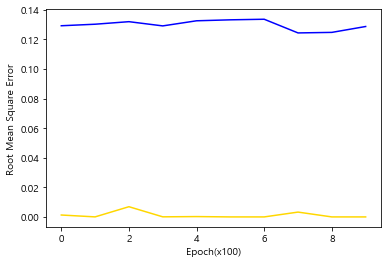

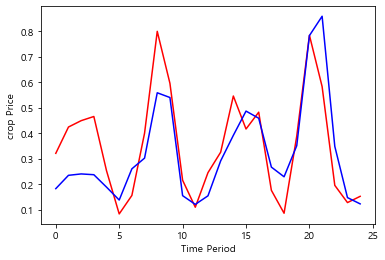

In [33]:
# 결과 그래프 출력
plt.figure(1)
plt.plot(train_error_summary, 'gold')
plt.plot(test_error_summary, 'b')
plt.xlabel('Epoch(x100)')
plt.ylabel('Root Mean Square Error')
 
plt.figure(2)
plt.plot(testY, 'r')
plt.plot(test_predict, 'b')
plt.xlabel('Time Period')
plt.ylabel('crop Price')
plt.show()

In [34]:
# sequence length만큼의 가장 최근 데이터를 슬라이싱한다
recent_data = np.array([x[len(x)-seq_length : ]])
print("recent_data.shape:", recent_data.shape)
print("recent_data:", recent_data)

recent_data.shape: (1, 50, 25)
recent_data: [[[0.         0.         0.93548387 ... 0.61290322 0.         0.        ]
  [0.         0.83870967 0.16129032 ... 0.67741935 0.         0.        ]
  [0.         0.80645161 0.19354839 ... 0.77419355 0.         0.        ]
  ...
  [0.         0.         0.70967742 ... 0.74193548 0.03225806 0.        ]
  [0.         0.06451613 0.87096774 ... 0.4516129  0.         0.        ]
  [0.         0.74193548 0.22580645 ... 0.67741935 0.         0.        ]]]


In [35]:
# 다음달 가격을 예측해본다
test_predict = sess.run(hypothesis, feed_dict={X: recent_data})
 
print("test_predict", test_predict[0])
test_predict = reverse_min_max_scaling(price,test_predict) # 금액데이터 역정규화한다
print("다음달 예측가격", test_predict[0]) # 예측한 가격을 출력한다

test_predict [0.28257143]
다음달 예측가격 [747.01904]
